In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ev-sales-in-india-20142024/EV_Dataset.csv.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/ev-sales-in-india-20142024/EV_Dataset.csv.csv')
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


**Year-wise EV Sales in India**

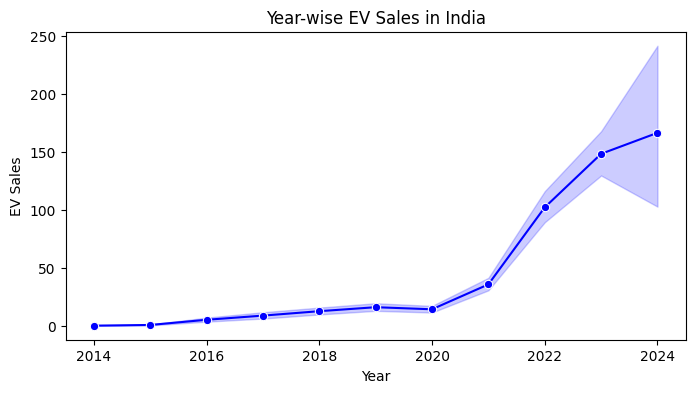

In [4]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o', color='blue')
plt.title('Year-wise EV Sales in India')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.show()


In [5]:
print(df.columns)


Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


In [6]:
print(df['Month_Name'].unique())


['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'oct' 'nov' 'dec']


****Month-wise EV Sales Trend****

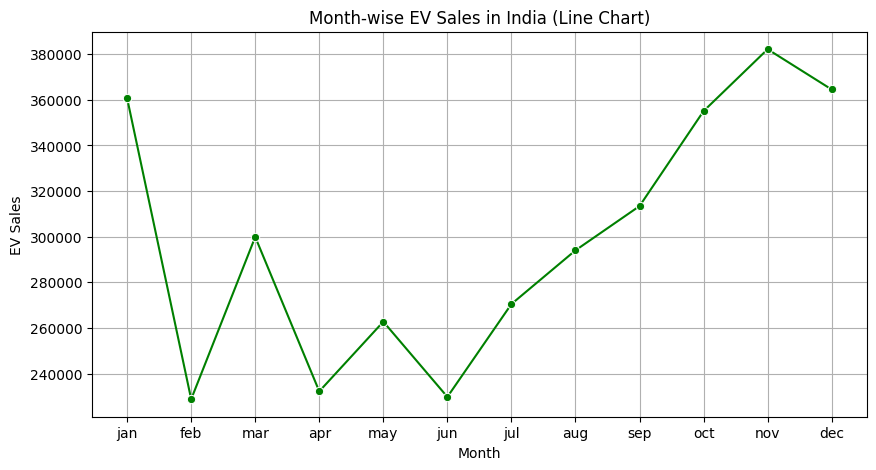

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns


df['Month_Name'] = df['Month_Name'].str.strip().str.lower()


month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


monthly_sales = df.groupby('Month_Name')['EV_Sales_Quantity'].sum().reindex(month_order)


plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')
plt.title("Month-wise EV Sales in India (Line Chart)")
plt.xlabel("Month")
plt.ylabel("EV Sales")
plt.grid(True)
plt.show()





****State-wise EV Sales****

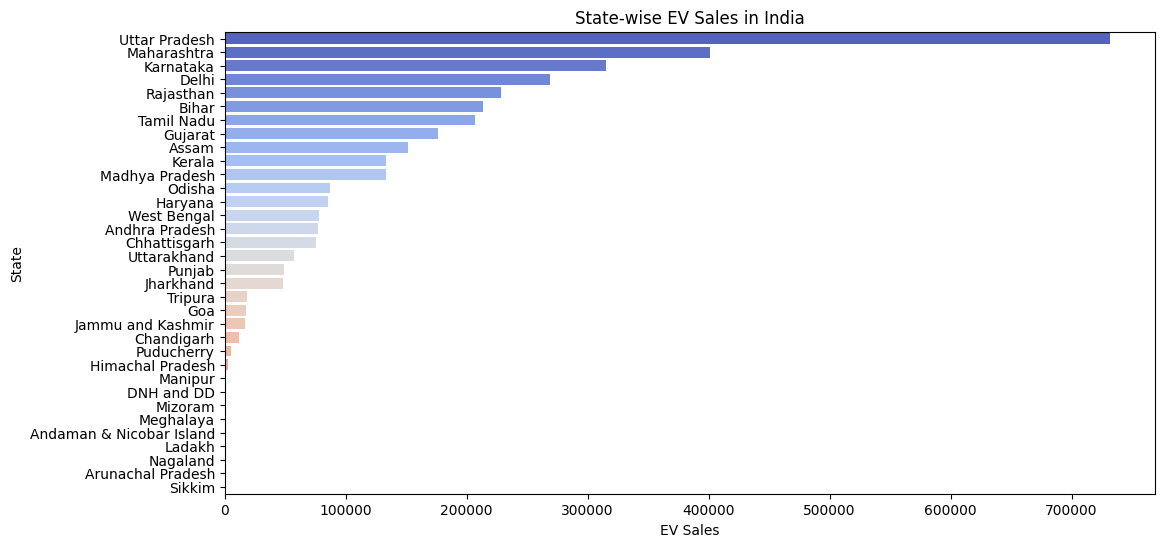

In [8]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(y='State', x='EV_Sales_Quantity', data=state_sales, palette='coolwarm')
plt.title('State-wise EV Sales in India')
plt.xlabel('EV Sales')
plt.ylabel('State')
plt.show()


****Vehicle Class Distribution****

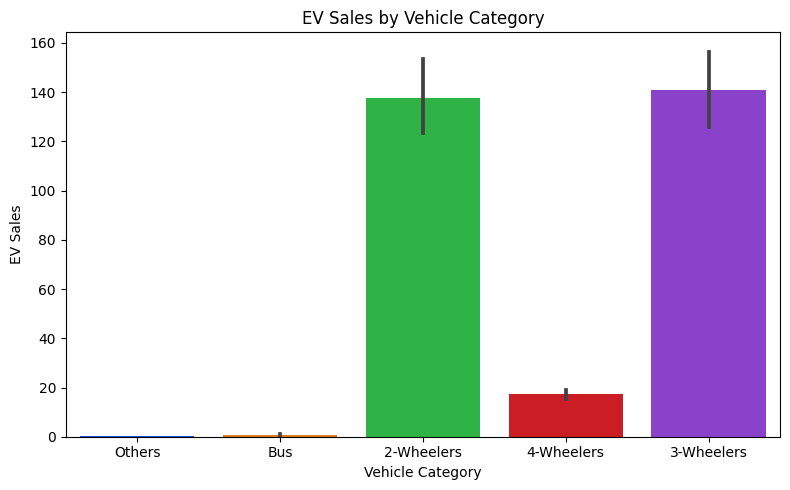

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x='Vehicle_Category', 
            y='EV_Sales_Quantity', 
            data=df, 
            palette='bright')
plt.title('EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


 ****EV Sales by Vehicle Category****

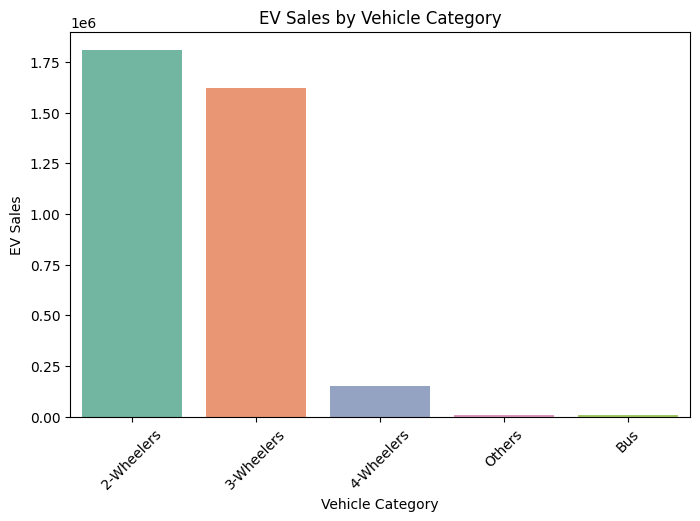

In [10]:
cat_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=cat_sales, palette='Set2')
plt.title('EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.show()


****EV Sales by Vehicle Type****

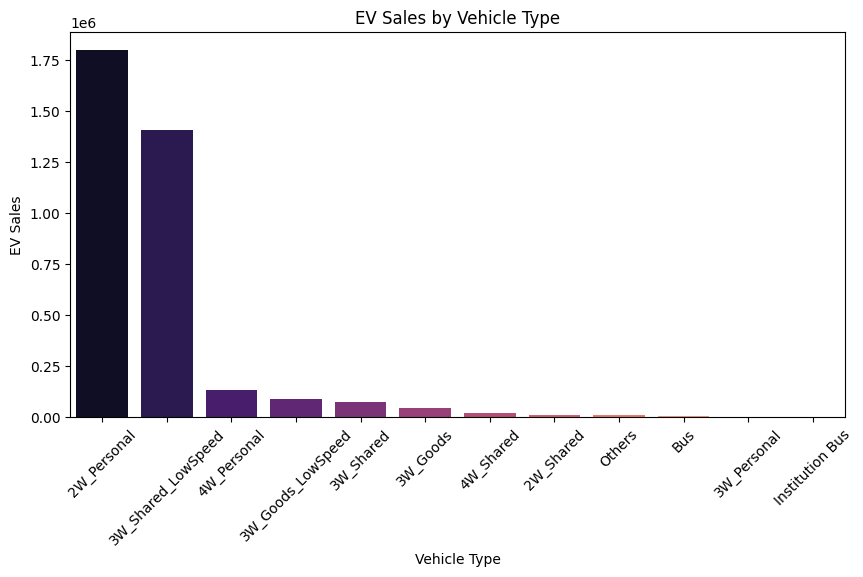

In [11]:
type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=type_sales, palette='magma')
plt.title('EV Sales by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.show()
